Load banglore home prices into a dataframe

In [465]:
import pandas as pd
data=pd.read_csv("C:/Users/lenovo/Downloads/bengaluru_house_prices.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [466]:
data.shape

(13320, 9)

In [467]:
data=data.drop(['availability','area_type','balcony','society'],axis='columns')

Data Cleaning: Handle NA values

In [468]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [469]:
data=data.dropna()

In [470]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Feature Engineering

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [471]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [472]:
data['bhk']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [473]:
data.drop(['size'],axis='columns')

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


Explore total_sqft feature

In [474]:
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [475]:
data=data[data.bhk<16]
data.shape

(13241, 6)

Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [476]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [477]:
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [478]:
data[~data['total_sqft'].apply(to_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [479]:
def covert_data(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [480]:
data['total_sqft']=data['total_sqft'].apply(covert_data)

In [481]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [482]:
data=data.dropna()

Add new feature called price per square feet

In [483]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [484]:
s=data['location'].value_counts()
less_than_10=s[s<=10]

In [485]:
data.location = data.location.apply(lambda x: 'other' if x in less_than_10 else x )

In [486]:
data.location.nunique()

241

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [487]:
data=data[~(data['total_sqft']/data['bhk']<300)]
data.shape

(12455, 7)

 normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [488]:
data.price_per_sqft.describe()

count     12455.000000
mean       6308.567740
std        4168.288380
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [489]:
data=data[(data.price_per_sqft>=data.price_per_sqft.quantile(0.10)) & (data.price_per_sqft<=data.price_per_sqft.quantile(0.99))]

In [490]:
data.price_per_sqft.describe()

count    11096.000000
mean      6402.781760
std       2954.291463
min       3500.000000
25%       4512.092469
50%       5508.268241
75%       7083.333333
max      21731.936018
Name: price_per_sqft, dtype: float64

In [491]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Whitefield', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Bommanahalli', 'Doddathoguru', 'Gunjur',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur', 'Kengeri',
       'Sarjapura - Attibele Road', 'Yeshwanthpur', 'Nagarbhavi',
       'Devanahalli', 'Ramamurthy Nagar', 'Sarjapur  Road

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

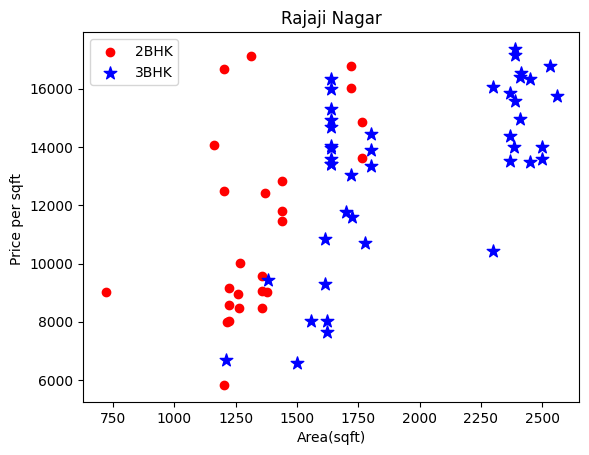

In [492]:
from matplotlib import pyplot as plt
def scatter(data,location):
    bhk2=data[(data.location==location)&(data.bhk==2)]
    bhk3=data[(data.location==location)&(data.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='r',label='2BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='b',label='3BHK',marker="*",s=90)
    plt.xlabel('Area(sqft)')
    plt.ylabel('Price per sqft ')
    plt.title(location)
    plt.legend()

scatter(data,'Rajaji Nagar')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [493]:
import numpy as np
def remove_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')      

data=remove_outliers(data)          

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

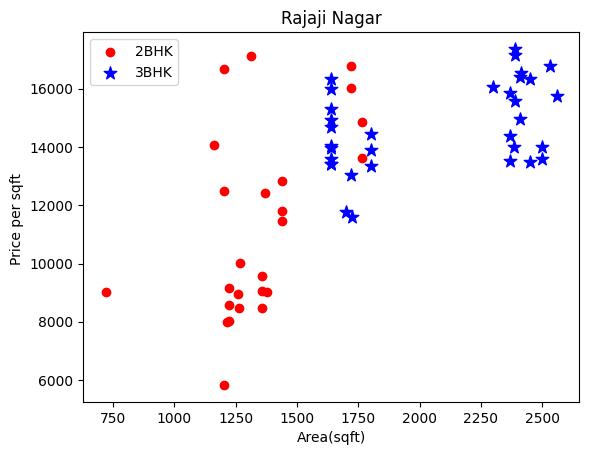

In [494]:
scatter(data,'Rajaji Nagar')

Text(0, 0.5, 'count')

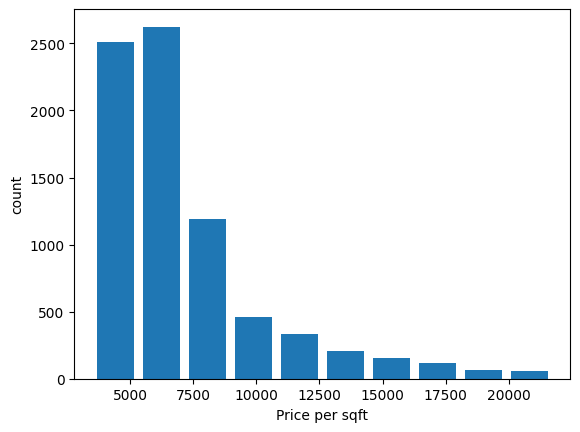

In [495]:
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('count')

Outlier Removal Using Bathrooms Feature

In [496]:
data.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 14., 12., 13.])

In [497]:
data=data[~(data.bath>data.bhk+2)]
data=data.drop(['size','price_per_sqft'],axis='columns')
data

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,47.00,2
13314,Green Glen Layout,1715.0,3.0,112.00,3
13316,other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


Use One Hot Encoding For Location

In [498]:
dummies_data=pd.get_dummies(data.location,dtype=int)

In [499]:
data=pd.concat([data.drop(['location'],axis='columns'),dummies_data.drop(['other'],axis='columns')],axis='columns')

In [500]:
data.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Building a Model

In [501]:
x=data.drop(['price'],axis='columns')
y=data.price

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(learning_rate=0.7,n_estimators=300)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
xtrain , xtest,ytrain,ytest=train_test_split(x,y,test_size=20,random_state=25)
gb.fit(xtrain,ytrain)
gb.score(xtest,ytest)

#lr=LinearRegression()
#lr.fit(xtrain,ytrain)
#lr.score(xtest,ytest)

0.8818670402462294

Test the model for few properties

In [503]:
loc = np.where(x.columns=="1st Block Jayanagar")[0]
x = np.zeros(len(x.columns))
x[0] = 900
x[1] = 2
x[2] = 4
if loc >= 0:
    x[loc] = 1

gb.predict([x])[0]

d:\Python\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


116.01242081364845

Export the tested model to a pickle file

In [504]:
import pickle
with open('bengaluru_house_prices().pickel','wb') as f:
    pickle.dump(gb,f)

Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))